# VIX Replication Demo

## Rutgers Quantitative Finance Club, February 21, 2019 
### Shantanu Laghate (Vice President), Pranav Sabanayagam (Advanced Finance Chair)


The following notebook provides an approximate calculation for the VIX Volatility Index. The steps are described in more detail in this paper, presented by the CBOE: https://www.cboe.com/micro/vix/vixwhite.pdf. 

A few main steps are followed to find the vix values on a given date:

1) Select the options that are to be used in the VIX Calculation.

* These options have expiries that are more than 23 but less than 37 calendar days further from the current date. These options must expire on a Friday.

* Both call and put options are to be used

* The forward index level, $F$, and the strike price immediately below the forward index level $K_0$

2) Calculate Volatility for both near-term and next-term options

* The formula for $\sigma^2$ for near-term and next-term can be found in the white paper linked above. 

* The VIX Index is an amalgam of the information reflected in the prices of all of the selected options. The contribution of a single option to the VIX value is proportional to ΔK and the price of that option, and inversely proportional to the square of the option’s strike price.

3) Take the 30-day Moving average

* Calculate the 30-day moving average for the $\sigma$, and take the square root and multiply by 100 to get the VIX Value.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

## Import Data

Warning: This cell takes a long time to run (~10mins)

In [2]:
data = pd.read_csv('SPX_92017_12018.csv')
data = data[['date', 'symbol', 'exdate', 'cp_flag', 'strike_price', 'best_bid', 'best_offer',
             'volume', 'impl_volatility', 'delta']]
data['date'] = pd.to_datetime(data['date'])
data['exdate'] = pd.to_datetime(data['exdate'])
data['strike_price'] = data['strike_price'] / 1000
data

,date,symbol,exdate,cp_flag,strike_price,best_bid,best_offer,volume,impl_volatility,delta
0,2017-09-01,SPX 170915C1000000,2017-09-15,C,1000000000,1472.9,1478.3,600,1.669524,0.998123
1,2017-09-01,SPX 170915C1025000,2017-09-15,C,1025000000,1447.9,1453.3,0,1.620460,0.998130
2,2017-09-01,SPX 170915C1050000,2017-09-15,C,1050000000,1423.0,1428.3,0,1.597916,0.997955
3,2017-09-01,SPX 170915C1075000,2017-09-15,C,1075000000,1398.0,1403.3,0,1.551217,0.997959
4,2017-09-01,SPX 170915C1100000,2017-09-15,C,1100000000,1373.0,1378.3,0,1.505575,0.997964
5,2017-09-01,SPX 170915C1125000,2017-09-15,C,1125000000,1348.0,1353.3,0,1.460940,0.997971
6,2017-09-01,SPX 170915C1150000,2017-09-15,C,1150000000,1323.0,1328.3,0,1.417261,0.997979
7,2017-09-01,SPX 170915C1175000,2017-09-15,C,1175000000,1298.0,1303.4,0,1.397241,0.997780
8,2017-09-01,SPX 170915C1200000,2017-09-15,C,1200000000,1273.1,1278.4,0,1.375646,0.997574
9,2017-09-01,SPX 170915C1225000,2017-09-15,C,1225000000,1248.1,1253.4,0,1.334739,0.997573


## Find VIX value at the given date

Execute the tasks listed above to find the VIX value (approximate) on a given date. Some assumptions regarding the weighted were taken due to simplicity of code and demonstration, majorly:

* not dropping the outlier options when calculating the contribution of each strike price
* dropping minutes from the settlement and current days while calculating $T$
* constant interest rates at 0.0305%

Despite these simplifications, this metric is within ~5% of the actual VIX values.

In [95]:
from datetime import timedelta
import datetime

def find_vix(datex):
    options = data[(data.date == datex) & 
               (data.exdate > datex + timedelta(days=23)) & 
               (data.exdate < datex + timedelta(days=37)) & 
                  (data.exdate.dt.day_name() == 'Friday')]
    
    options = options.assign(Te = (data.exdate - datex))
    
    
    smallest_spread = []
    T = []
    
    if len(options.exdate.unique()) < 2:
        return np.nan
    try:
        for edate in sorted(options.exdate.unique()):
            exp = options[options.exdate == edate]
            T.append(exp.Te.iloc[0].days*60*24/525600)
            calls = exp[exp.cp_flag == 'C']
            puts = exp[exp.cp_flag == 'P']
            
            half_point_C = len(calls) // 2
            half_point_P = len(puts) // 2

            start_C = half_point_C
            while (start_C > 0 and calls.iloc[start_C].best_bid > 0):
                start_C -= 1
            end_C = half_point_C
            while (end_C < len(calls) and calls.iloc[end_C].best_bid > 0):
                end_C += 1

            start_P = half_point_P
            while (start_P > 0 and calls.iloc[start_P].best_bid > 0):
                start_P -= 1
            end_P = half_point_P
            while (end_P < len(calls) and calls.iloc[end_P].best_bid > 0):
                end_P += 1

            calls = calls.iloc[start_C:end_C]
            puts = puts.iloc[start_P:end_P]

            puts = puts.add_suffix('_put')
            puts.rename(columns={'strike_price_put': 'strike_price'}, inplace=True)

            merged = pd.merge(calls, puts, on='strike_price')

            merged = merged.assign(f = abs((merged.best_bid+merged.best_offer)/2 - 
                                                    (merged.best_bid_put+merged.best_offer_put)/2)) \
                                    .sort_values('f')

            smallest_spread.append((merged.f.iloc[0], merged.strike_price.iloc[0]))

        #return smallest_spread

        # Near-term value
        d1, s1 = smallest_spread[0]
        # Next-term value
        d2, s2 = smallest_spread[1]

        T1 = T[0]
        T2 = T[1]

        R = 0.000305

        F1 = s1 + np.exp(R*T1) * d1
        F2 = s2 + np.exp(R*T2) * d2

        def myround(x, base=5):
            return int(base * round(float(x)/base))

        # List with K01 and K02 in it
        K = [myround(F1), myround(F2)]
        X = []

        for edate, ind in zip(sorted(options.exdate.unique()), [0, 1]):
            exp = options[options.exdate == edate]
            exp = exp.sort_values(by='strike_price')

            calls = exp[(exp.cp_flag == 'C') & (exp.strike_price >= K[ind])]
            puts = exp[(exp.cp_flag == 'P') & (exp.strike_price < K[ind])]

            chain = pd.concat([puts, calls])

            chain = chain.assign(mid_quote = (chain.best_bid + chain.best_offer)/2)

            chain = chain.assign(diffk = abs(chain.strike_price.diff(periods=-1)))[:-1]

            chain = chain.assign(contribution = chain.diffk/(chain.strike_price**2)*np.exp(R*T[ind])*chain.mid_quote)

            X.append(2/T[ind]*chain.contribution.sum())


        Y = []
        for i in range(2):
            Y.append(1/T[i] * (F1/K[i] - 1)**2)

        sigma = []
        for i in range(2):
            sigma.append(X[i] - Y[i])

        N30 = 43200
        N365 = 525600



        vix_day = 100 * np.sqrt((T[0]*sigma[0]*((T[1]*N365 - N30)/(T[1]*N365 - T[0]*N365)) + 
                            T[1]*sigma[1]*((N30 - T[0]*N365)/(T[1]*N365 - T[0]*N365)))*(N365/N30))
        return vix_day
    except:
        return np.nan

find_vix(data.date[0])

10.890868872731254

In [99]:
vix = data['date'].drop_duplicates().to_frame().reset_index().drop(columns = 'index')
#vix["VIX"] = find_vix(vix.date)
vix_vals = []
for i in range(len(vix)):
    vix_vals.append(find_vix(vix['date'].iloc[i]))
vix['VIX'] = vix_vals
vix

,date,VIX
0,2017-09-01,10.890869
1,2017-09-05,12.777273
2,2017-09-06,NaN
3,2017-09-07,11.728661
4,2017-09-08,12.392604
5,2017-09-11,10.837038
6,2017-09-12,10.671837
7,2017-09-13,NaN
8,2017-09-14,10.615863
9,2017-09-15,10.236678


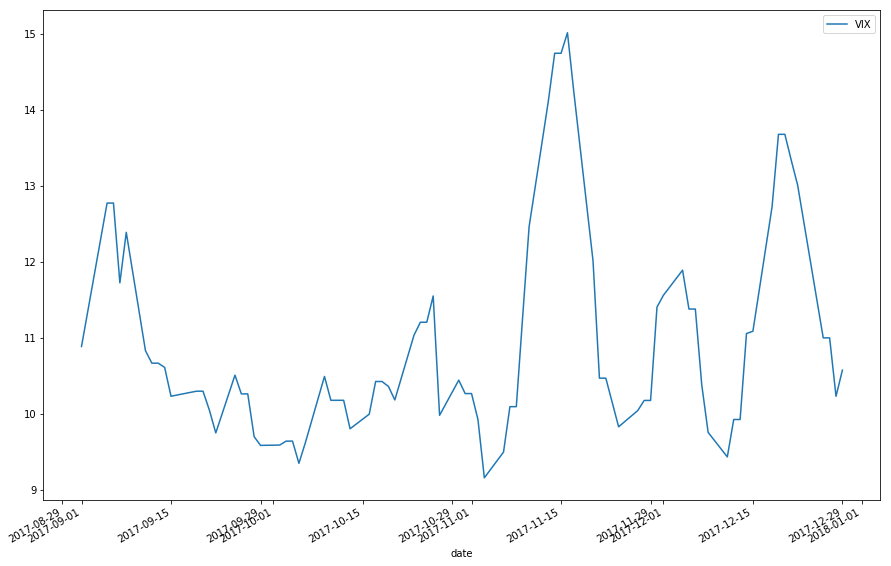

In [105]:
% matplotlib inline
vix = vix.fillna(method='ffill')
vix.plot(x='date', y='VIX', figsize=(15, 10))

# Comparison to Yahoo Finance Chart
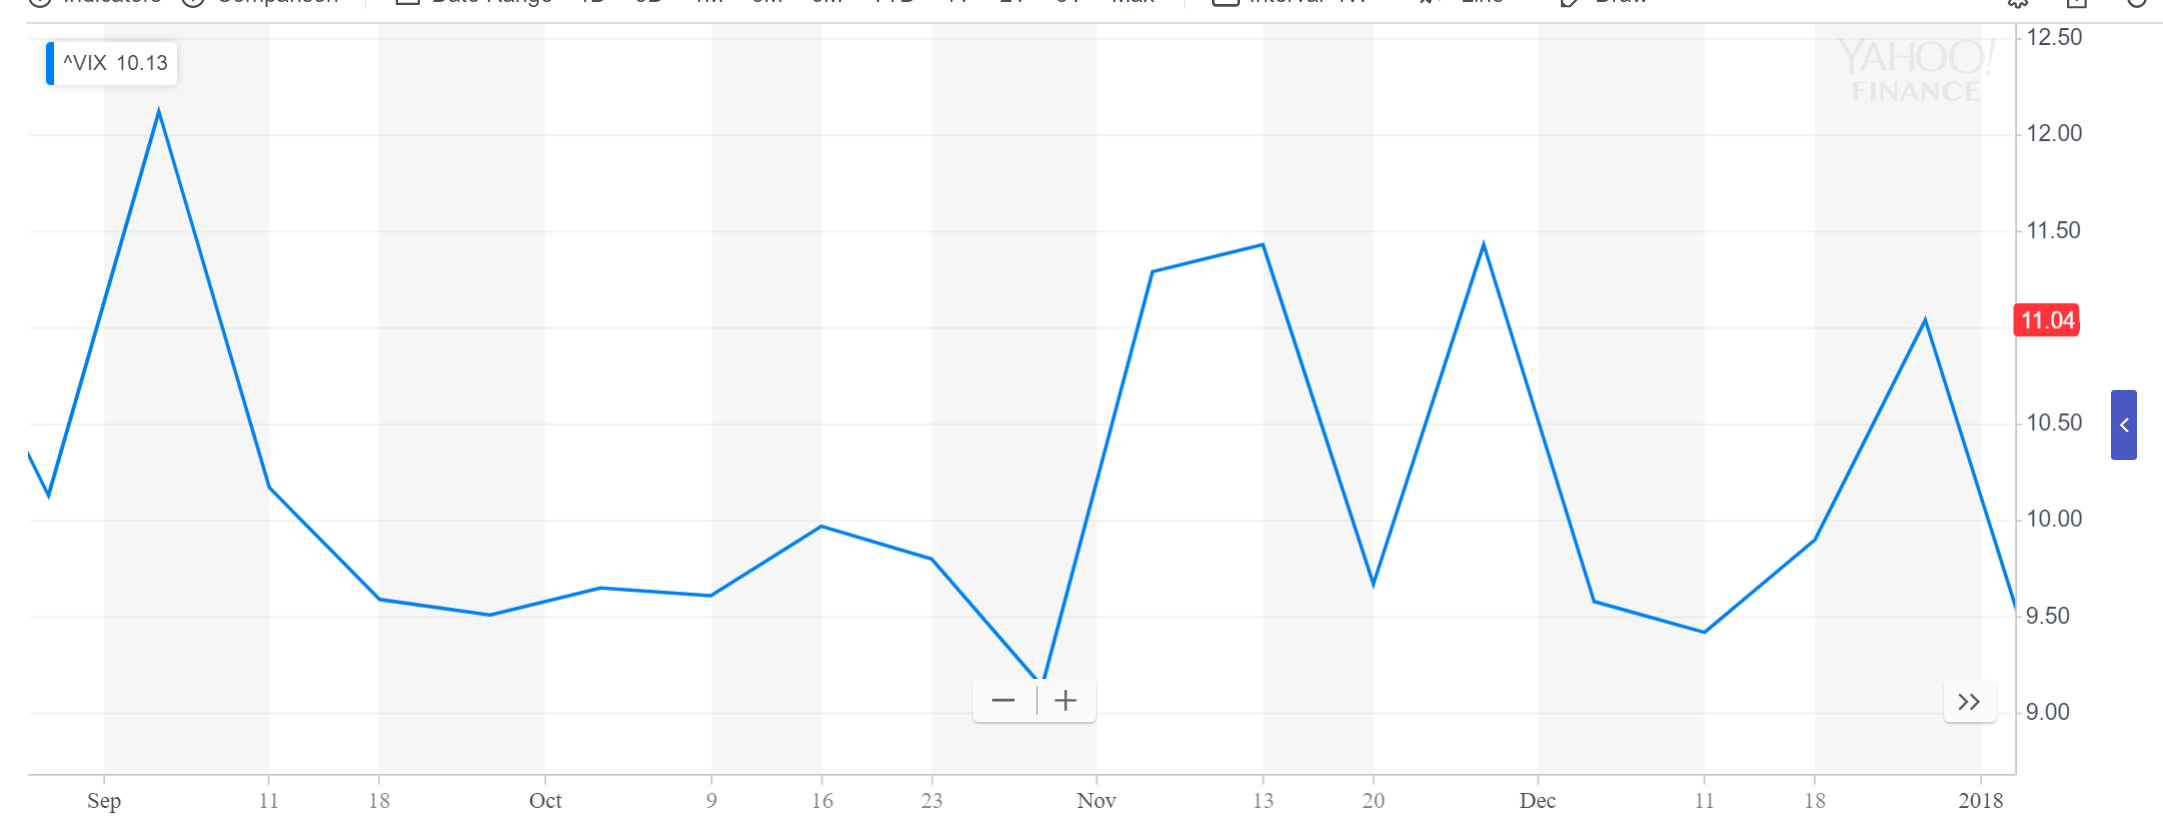